# Compare SNA and SNA Riccati, should be the identical

SNA estimates the hessian matrix and then uses np.linalg.inv(), while SNA Riccati estimates the inverse of the hessian matrix directly using Riccati formula. The two methods should be identical.

In [1]:
import numpy as np
from functools import partial

from simulation import Simulation
from objective_functions import LogisticRegression, LinearRegression
from datasets import generate_logistic_regression, generate_linear_regression
from optimization_algorithms import SNA, SNARiccati, WASNA, WASNARiccati

N = 20
n = int(1e4)

true_theta = np.array([0, 3, -9, 4, -9, 15, 0, -7, 1, 0])  # Set bias=True
bias_setting = True

e_values = [1]

optimizer_list = [
    SNA(nu=1.0),
    SNARiccati(nu=1.0),
    WASNA(nu=0.75),
    WASNARiccati(nu=0.75),
    WASNA(nu=1.0),
    WASNARiccati(nu=1.0),
]

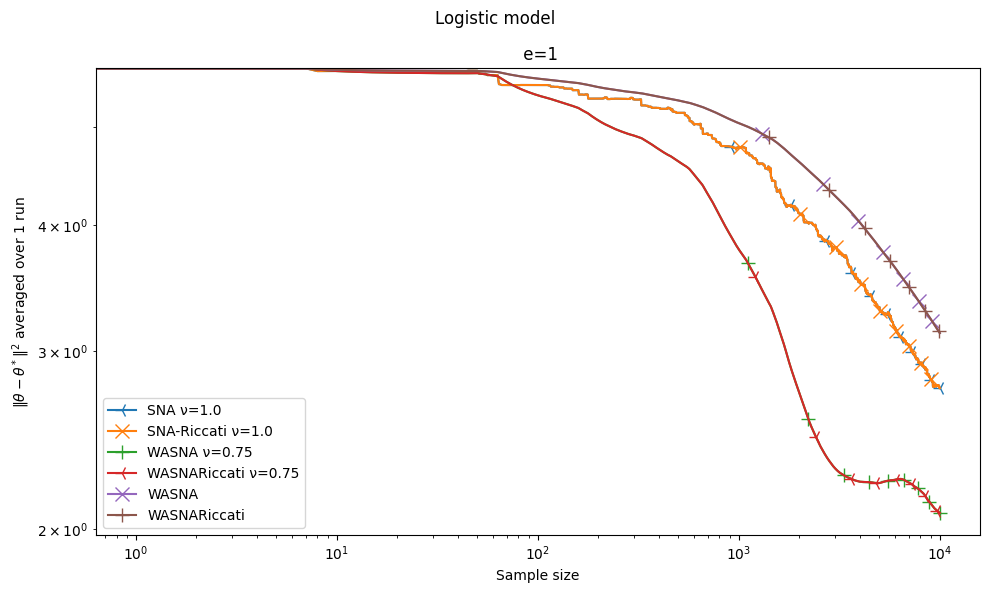

In [2]:
objective_function = LogisticRegression(bias=bias_setting)
simulation = Simulation(
    objective_function,
    optimizer_list,
    true_theta=true_theta,
    generate_dataset=partial(generate_logistic_regression, bias=bias_setting),
    e_values=e_values,
)

# One run
simulation.run_multiple_datasets(N=1, n=n)

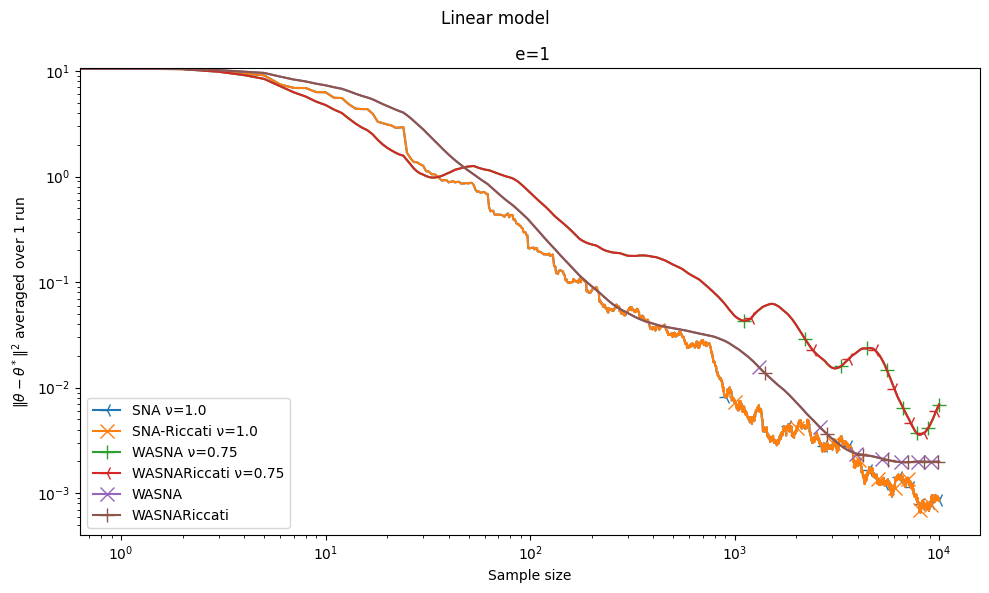

In [3]:
objective_function = LinearRegression(bias=bias_setting)
simulation = Simulation(
    objective_function,
    optimizer_list,
    true_theta=true_theta,
    generate_dataset=partial(generate_linear_regression, bias=bias_setting),
    e_values=e_values,
)

# One run
simulation.run_multiple_datasets(N=1, n=n)

# Compare canonical Z and canonical deterministic Z, should be close

## USNA

In [4]:
from optimization_algorithms import USNA

optimizer_list = [
    USNA(nu=1.0, gamma=0.75, generate_Z="normal"),
    USNA(nu=1.0, gamma=0.75, generate_Z="canonic"),
    USNA(nu=1.0, gamma=0.75, generate_Z="canonic deterministic"),
    USNA(nu=1.0, gamma=1.0, generate_Z="normal"),
    USNA(nu=1.0, gamma=1.0, generate_Z="canonic"),
    USNA(nu=1.0, gamma=1.0, generate_Z="canonic deterministic"),
]

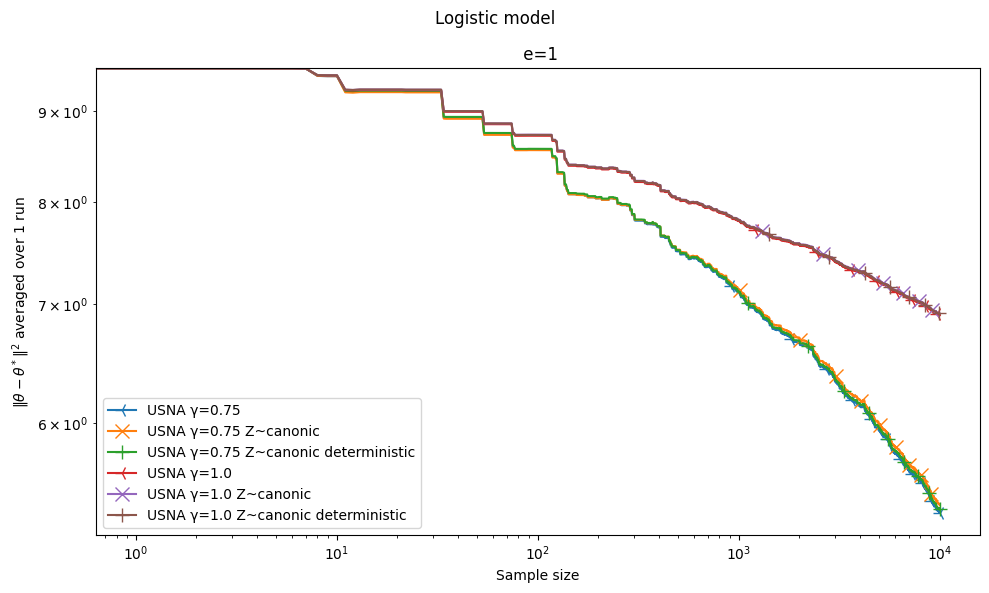

In [5]:
objective_function = LogisticRegression(bias=bias_setting)
simulation = Simulation(
    objective_function,
    optimizer_list,
    true_theta=true_theta,
    generate_dataset=partial(generate_logistic_regression, bias=bias_setting),
    e_values=e_values,
)

# One run
simulation.run_multiple_datasets(N=1, n=n)

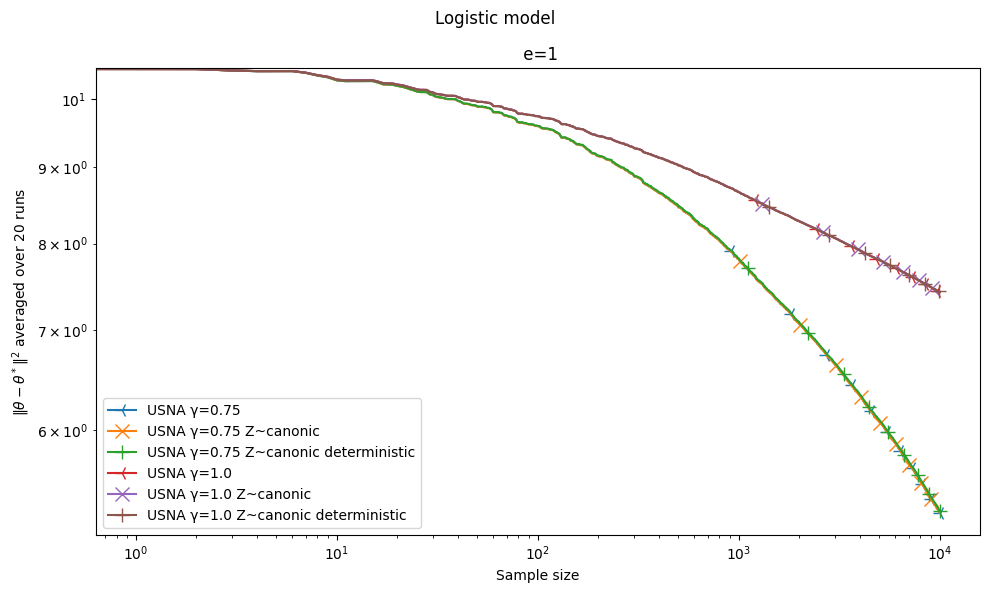

In [6]:
# Average over N runs
simulation.run_multiple_datasets(N=N, n=n)

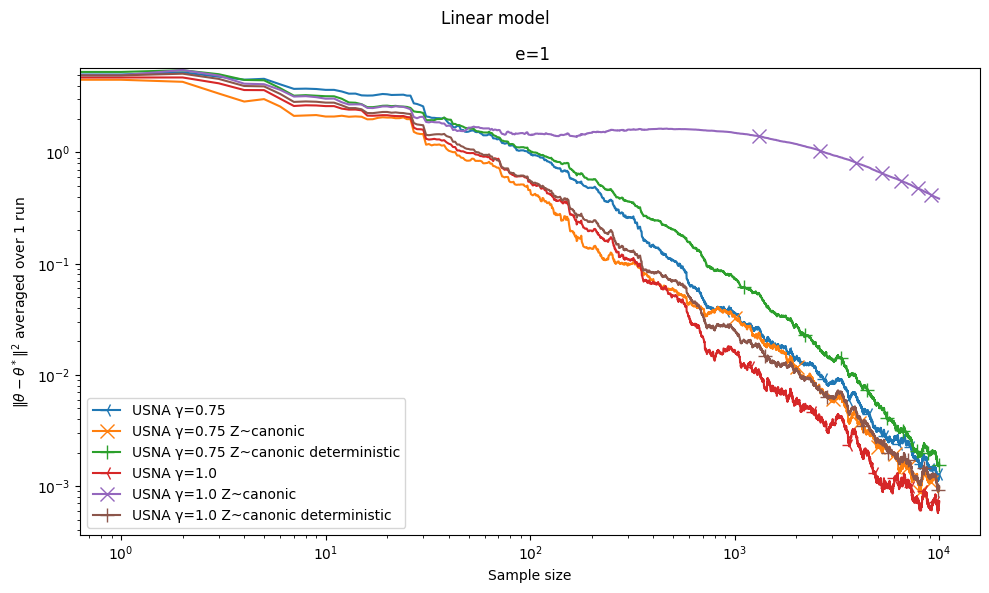

In [7]:
objective_function = LinearRegression(bias=bias_setting)
simulation = Simulation(
    objective_function,
    optimizer_list,
    true_theta=true_theta,
    generate_dataset=partial(generate_linear_regression, bias=bias_setting),
    e_values=e_values,
)

# One run
simulation.run_multiple_datasets(N=1, n=n)

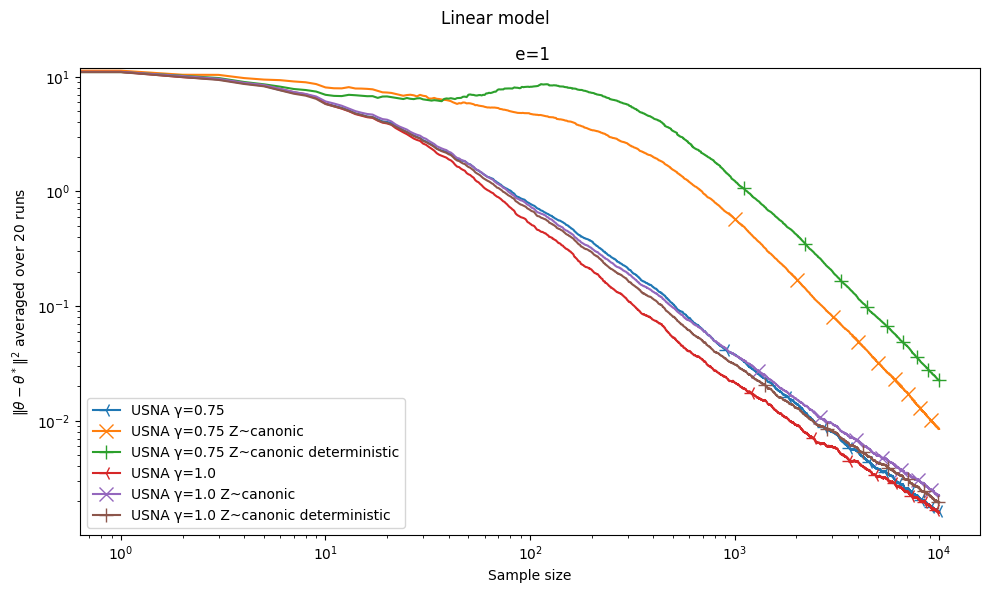

In [8]:
# Average over N runs
simulation.run_multiple_datasets(N=N, n=n)

## UWASNA

In [9]:
from optimization_algorithms import UWASNA

optimizer_list = [
    UWASNA(nu=1.0, gamma=0.75, generate_Z="normal"),
    UWASNA(nu=1.0, gamma=0.75, generate_Z="canonic"),
    UWASNA(nu=1.0, gamma=0.75, generate_Z="canonic deterministic"),
    UWASNA(nu=1.0, gamma=1.0, generate_Z="normal"),
    UWASNA(nu=1.0, gamma=1.0, generate_Z="canonic"),
    UWASNA(nu=1.0, gamma=1.0, generate_Z="canonic deterministic"),
]

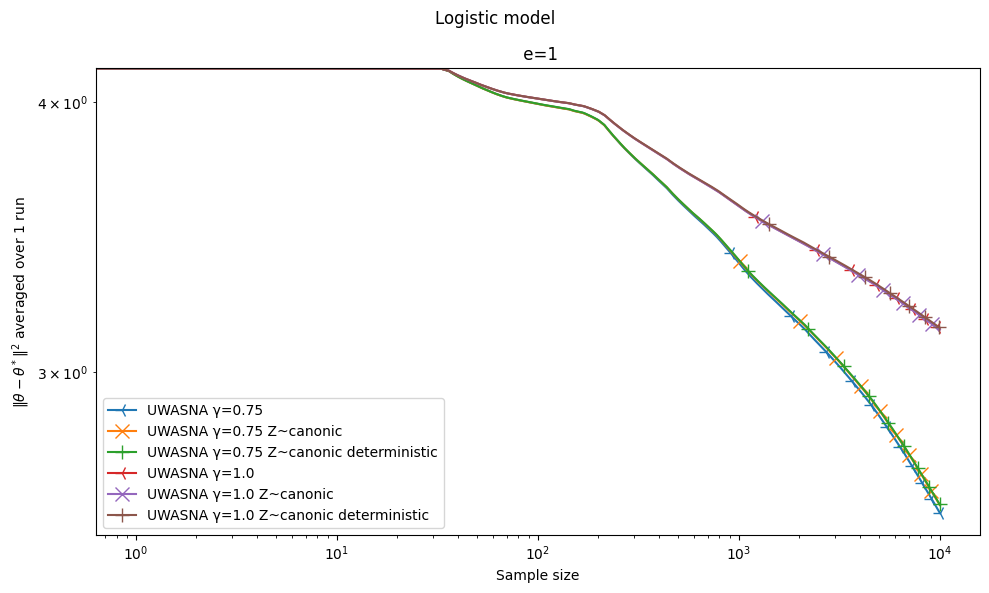

In [10]:
objective_function = LogisticRegression(bias=bias_setting)
simulation = Simulation(
    objective_function,
    optimizer_list,
    true_theta=true_theta,
    generate_dataset=partial(generate_logistic_regression, bias=bias_setting),
    e_values=e_values,
)

# One run
simulation.run_multiple_datasets(N=1, n=n)

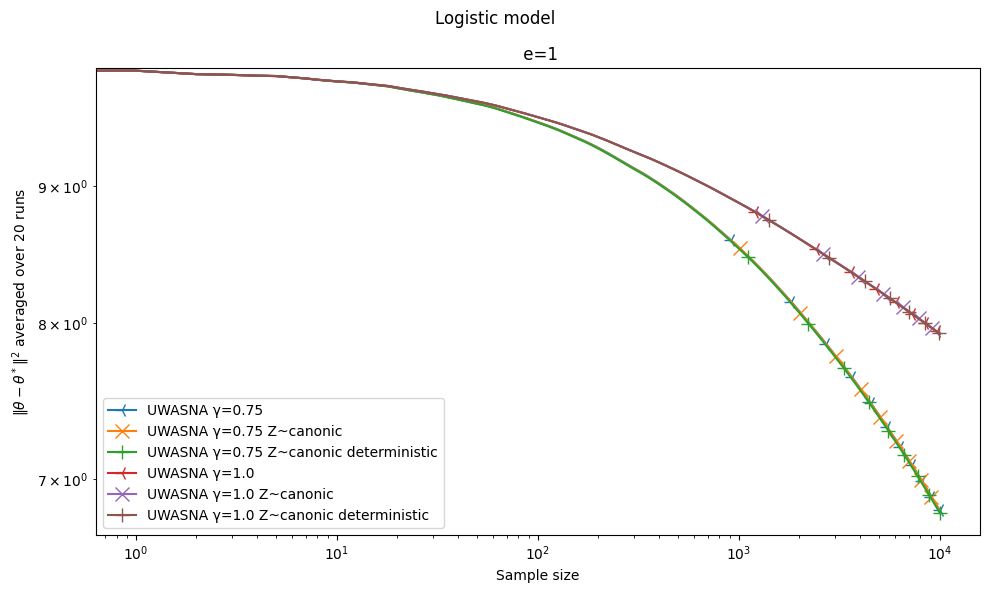

In [11]:
# Average over N runs
simulation.run_multiple_datasets(N=N, n=n)

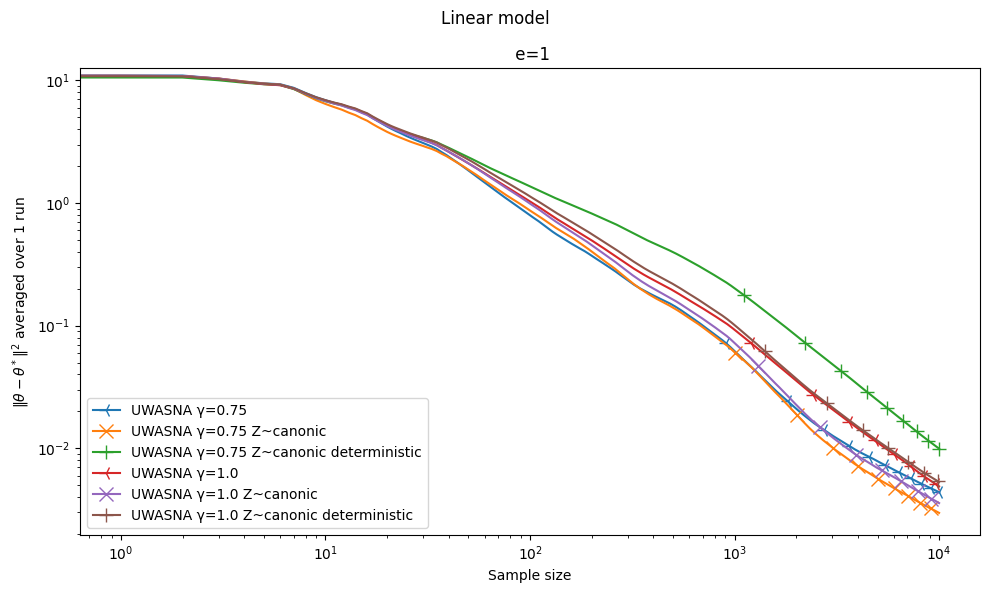

In [12]:
objective_function = LinearRegression(bias=bias_setting)
simulation = Simulation(
    objective_function,
    optimizer_list,
    true_theta=true_theta,
    generate_dataset=partial(generate_linear_regression, bias=bias_setting),
    e_values=e_values,
)

# One run
simulation.run_multiple_datasets(N=1, n=n)

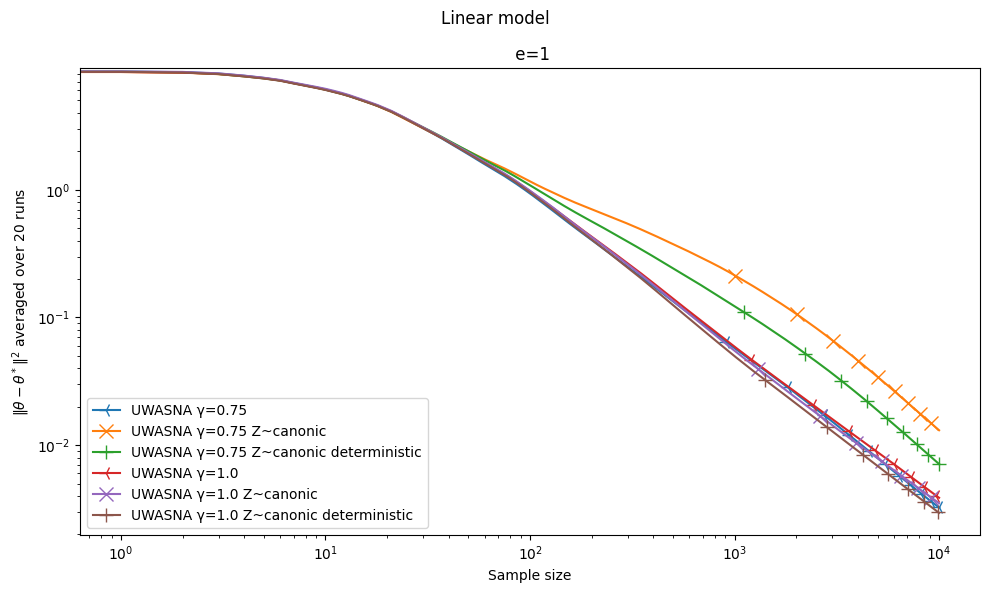

In [13]:
# Average over N runs
simulation.run_multiple_datasets(N=N, n=n)

# USNA : np.dot VS np.linalg.norm

In [14]:
import numpy as np
import timeit

# Generate random vectors Q and Z of size n
n = 1000  # Example vector size
Q = np.random.rand(n)
Z = np.random.rand(n)

# Define the functions to measure
def dot_product_approach():
    def step(iteration):
        gamma = 1 / iteration
        beta = 1 / (2 * gamma)
        return np.dot(Q, Q) <= beta**2

    for i in range(10_000, 100_000):
        res = step(i)

    return res


def norm_approach():
    def step(iteration):
        gamma = 1 / iteration
        beta = 1 / (2 * gamma)
        return np.linalg.norm(Q) <= beta

    for i in range(10_000, 100_000):
        res = step(i)

    return res


# Measure execution time
dot_time = timeit.timeit(dot_product_approach, number=10)
norm_time = timeit.timeit(norm_approach, number=10)

print("Time using np.dot for squared magnitude: {:.6f} seconds".format(dot_time))
print(
    "Time using np.linalg.norm for squared magnitude: {:.6f} seconds".format(norm_time)
)

Time using np.dot for squared magnitude: 0.608169 seconds
Time using np.linalg.norm for squared magnitude: 1.279848 seconds


# Test if $\Sigma$ is positive definite

In [15]:
import numpy as np

d = 10
covariance_matrix_article = np.zeros((d, d))
covariance_matrix_exponential = np.zeros((d, d))

for i in range(d):
    for j in range(d):
        covariance_matrix_article[i, j] = abs(i - j) ** 0.5
        covariance_matrix_exponential[i, j] = np.exp(-abs(i - j))

eigenvalues_article, eigenvectors_article = np.linalg.eigh(covariance_matrix_article)
eigenvalues_exponential, eigenvectors_exponential = np.linalg.eigh(
    covariance_matrix_exponential
)
print("Eigenvalues article:", eigenvalues_article, "\n")
print("Eigenvalues exponential:", eigenvalues_exponential, "\n")

Eigenvalues article: [-6.22282051 -2.9144047  -1.71798267 -1.30522888 -1.05964319 -0.9296666
 -0.8447567  -0.79589457 -0.76866702 16.55906485] 

Eigenvalues exponential: [0.47038965 0.49618816 0.54262621 0.61545695 0.72383003 0.8807853
 1.10155481 1.39443304 1.73615955 2.03857629] 

